# Basic RigolWFM Usage

**Scott Prahl**

**March 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol
except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

repo = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/"

## Introduction

The idea is to create a robust, fast parser for waveform `.wfm` files created by Rigol oscilloscopes. Specifically,

```python
    import matplotlib.pyplot as plt
    import RigolWFM.wfm as rigol

    model = "DS1102E'
    filename = "name.wfm"
    scope_data = rigol.Wfm.from_file(filename, model)
    description = scope_data.describe()
    print(description)
    
    url = "https://somewebsite.com/path/file.wfm"
    scope_data = rigol.Wfm.from_url(url, model)
    for ch in scope_data.channels:
        plt.plot(ch.times, ch.volts, label=ch.name)
    plt.legend()
    plt.show()
```

## Motivation

The `.wfm` format offers a few nice advantages

* saving onto a USB drive on the scope is fast
* uploading the `.wfm` file back to the scope is (sometimes) possible
* no need to interface to a computer
* the files are small (one byte per point)
* all the settings are contained in the file header

The disadvantage are that different scopes (and often different firmware version) have different formats.  Worse, documentation from Rigol on these formats is sparse at best.  Finally, the Rigol software to support reading these files is klunky.

## Possible Scope Models

This program currently covers six classes of scopes.

### DS1000C untested

Support for these models is in the program, but parsing is completely untested.

Handy Abbreviations: `C`, `1000C`, `DS1000C`

Specific Models: `DS1000CD`, `DS1000C`, `DS1000MD`, `DS1000M`, `DS1302CA`, `DS1202CA`, `DS1102CA`, `DS1062CA`

### DS1000E validated

Handy Abbreviations: `D`, `1000D`, `DS1000D`

Specific Models: `DS1102D`, `DS1052D`

Handy Abbreviations: `E`, `1000E`, `DS1000E`

Specific Models: `DS1000E`, `DS1102E`, `DS1052E`

### DS1000Z tested,  incorrect voltages

Handy Abbreviations: `Z`, `1000Z`, `DS1000Z`,

Specific Models: `DS1202Z`, `DS1074Z`, `DS1104Z`, `DS1074Z-S`,
                  `DS1104Z-S`, `MSO1054Z`, `DS1054Z`,
                  `MSO1074Z`, `MSO1104Z`, `DS1104Z`

### DS2000 tested

Handy Abbreviations: `2`, `2000`, `DS2000`,

Specific Models: `DS2102A`, `MSO2102A`, `MSO2102A-S`,
                 `DS2202A`, `MSO2202A`, `MSO2202A-S`,
                 `DS2302A`, `MSO2302A`, `MSO2302A-S`
                 

### DS4000 validated

Handy Abbreviations: `4`, `4000`, `DS4000`,

Specific Models: `DS4054`, `DS4052`, `DS4034`, `DS4032`, `DS4024`,
                 `DS4022`, `DS4014`, `DS4012`, `MSO4054`, `MSO4052`, `MSO4034`,
                 `MSO4032`, `MSO4024`, `MSO4022`, `MSO4014`, `MSO4012`]

### DS6000 untested

Support for these models is in the program, but parsing is completely untested.

Handy Abbreviations: `6`, `6000`, `DS6000`

Specific Models: `DS6062`, `DS6064`, `DS6102`, `DS6104`

## The `Wfm` class

This is a class with two basic methods to create objects from files and urls:

* Wfm.from_file(file_name, model)
* Wfm.from_url(url, model)

where `model` describes the scope.  

It also has a methods to manipulate the data.

* Wfm.describe()
* Wfm.csv()
* Wfm.plot()

The first two return strings.  The third produces a basic `matplotlib.pyplot.plt` object.

## Example for a remote file

First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [2]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS1102E-D.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, 'E')

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1102E-D.wfm?raw=true'


### Sample description

In [3]:
description = w.describe()
print(description)

    General:
        File Model   = wfm1000e
        User Model   = E
        Parser Model = wfm1000e
        Firmware     = unknown
        Filename     = DS1102E-D.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =  unknown
            Scale =     2.00  V/div
           Offset =     2.40  V
            Probe =       1X
         Inverted =    False

        Time Base =  100.000 µs/div
           Offset =    0.000  s
            Delta =  400.000 ns/point
           Points =     8188

         Count    = [        1,        2,        3  ...      8187,     8188]
           Raw    = [       41,       41,       41  ...       110,      110]
           Times  = [-1.638 ms,-1.637 ms,-1.637 ms  ...  1.637 ms, 1.638 ms]
           Volts  = [  4.48  V,  4.48  V,  4.48  V  ...  -1.04  V, -1.04  V]

     Channel 2:
         Coupling =  unknown
            Scale =     5.00  V/div
           Offset =   -15.80  V
            Probe =       1X
         Inverted =    False

        Ti

### Sample Plot

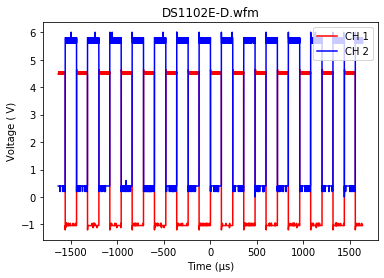

In [4]:
w.plot()
plt.show()

### Sample `.csv` file

In [5]:
s = w.csv()

# just show the first few entries
rows = s.split('\n')
for i in range(5):
    print(rows[i])


X,CH 1,CH 2,Start,Increment
µs, V, V,-6.000000e-04,1.000000e-06
-1637.600,4.48,0.40
-1637.200,4.48,0.40
-1636.800,4.48,0.40


## Example for a local file

You will need to adjust the path and filename for your computer

In [6]:
path = "../wfm/"
filename =  "DS1102E-D.wfm"
wfm_name = path + filename
w = rigol.Wfm.from_file(wfm_name, 'E')

description = w.describe()
print(description)

    General:
        File Model   = wfm1000e
        User Model   = E
        Parser Model = wfm1000e
        Firmware     = unknown
        Filename     = DS1102E-D.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =  unknown
            Scale =     2.00  V/div
           Offset =     2.40  V
            Probe =       1X
         Inverted =    False

        Time Base =  100.000 µs/div
           Offset =    0.000  s
            Delta =  400.000 ns/point
           Points =     8188

         Count    = [        1,        2,        3  ...      8187,     8188]
           Raw    = [       41,       41,       41  ...       110,      110]
           Times  = [-1.638 ms,-1.637 ms,-1.637 ms  ...  1.637 ms, 1.638 ms]
           Volts  = [  4.48  V,  4.48  V,  4.48  V  ...  -1.04  V, -1.04  V]

     Channel 2:
         Coupling =  unknown
            Scale =     5.00  V/div
           Offset =   -15.80  V
            Probe =       1X
         Inverted =    False

        Ti